ChEn-5310: Computational Continuum Transport Phenomena Fall 2021 UMass Lowell; Prof. V. F. de Almeida **29Sep21**

# 05a. Rayleigh-Ritz Method with Fourier Basis Functions <br> Weak Dirichlet BC
$ \newcommand{\Amtrx}{\boldsymbol{\mathsf{A}}}
  \newcommand{\Bmtrx}{\boldsymbol{\mathsf{B}}}
  \newcommand{\Gmtrx}{\boldsymbol{\mathsf{G}}}
  \newcommand{\Mmtrx}{\boldsymbol{\mathsf{M}}}
  \newcommand{\Imtrx}{\boldsymbol{\mathsf{I}}}
  \newcommand{\Pmtrx}{\boldsymbol{\mathsf{P}}}
  \newcommand{\Lmtrx}{\boldsymbol{\mathsf{L}}}
  \newcommand{\Umtrx}{\boldsymbol{\mathsf{U}}}
  \newcommand{\Smtrx}{\boldsymbol{\mathsf{S}}}
  \newcommand{\xvec}{\boldsymbol{\mathsf{x}}}
  \newcommand{\avec}{\boldsymbol{\mathsf{a}}}
  \newcommand{\bvec}{\boldsymbol{\mathsf{b}}}
  \newcommand{\cvec}{\boldsymbol{\mathsf{c}}}
  \newcommand{\rvec}{\boldsymbol{\mathsf{r}}}
  \newcommand{\fvec}{\boldsymbol{\mathsf{f}}}
  \newcommand{\mvec}{\boldsymbol{\mathsf{m}}}
  \newcommand{\gvec}{\boldsymbol{\mathsf{g}}}
  \newcommand{\zerovec}{\boldsymbol{\mathsf{0}}}
  \newcommand{\transpose}[1]{{#1}^\top}
  \DeclareMathOperator{\rank}{rank}
  \newcommand{\norm}[1]{\lVert{#1}\rVert}
  \newcommand{\Reals}{\mathbb{R}}
  \newcommand{\thetavec}{\boldsymbol{\theta}}
  \newcommand{\Ecal}{\mathscr{E}}
  \newcommand{\Dcal}{\mathscr{D}}$

---

## Table of Contents<a id="toc"></a>
* [Objectives](#obj)
1. [Poisson Problem with Dirichlet Boundary Conditions](#problem)
1. [Rayleigh-Ritz Method with Weakly Enforced Dirichlet Boundary Conditions](#rayleigh-ritz)
  + [Data](#data)
  + [Fourier Basis Functions](#fourier-basis)
  + [Results](#results)
---

## [Objectives](#toc)<a id="obj"></a>

 + Describe the Rayleigh-Ritz method for solving linear differential equations with symmetric positive definite operators (OneNote [Engy-5310-rayleigh-ritz-method](https://studentuml-my.sharepoint.com/:o:/g/personal/valmor_dealmeida_uml_edu/EsTzIb2Mcv5OkcSk0kSXXF8BXM4OnlzGfAd7sdcWLky-Gw?e=BLsLdo)).
 + Use the function approximation theory described in the course (see previous notebooks and notes).

## [Poisson Problem with Dirichlet Boundary Conditions](#toc)<a id="problem"></a>

The following sections describe what is referred to in the literature as the one-dimensional Poisson problem with homogeneous Dirichlet boundary conditions. This is a classical boundary-value problem of mathematics.

Solve the Poisson model problem. Find $u:[a,b]\subset\Reals\rightarrow\Reals$ such that:

\begin{align*}
 -\bigl(-D(x)\, u'\bigr)'(x) + S(x)\,u(x) + f(x) &= 0 \quad\quad \forall \quad\quad x\in\ ]a,b[, \\
 u(a) &= u_a, \\
 u(b) &= u_b.
\end{align*}
   
This problem is linear and has an analytical solution for given data: diffusion coefficient, $D(x)$, source slope, $S(x)$, source bias, $f(x)$. The *diffusion flux* associated to the quantity $u$, is denoted $q := -D(x)\,u'$, and it is often of interest as a derived quantity.
Re-writing the above in terms of the differential operator $\Dcal u := -\bigl(-D(\cdot)\, u'\bigr)'(\cdot) + S(\cdot)\,u(\cdot)$

\begin{align*}
 \Dcal u(x) + f(x) &= 0 \quad\quad \forall \quad\quad x\in\ ]a,b[, \\
 u(a) &= u_a, \\
 u(b) &= u_b.
\end{align*}

The values of the dependent variable are given on the two end points of the domain. This is called *essential* boundary conditions or  *Dirichlet boundary conditions*. If the values are equal to zero, the boundary condition is referred to as homogeneous.

## [Rayleigh-Ritz Method w/ Weakly Enforced Dirichlet Boundary Conditions](#toc)<a id="rayleigh-ritz"></a>

Find $u^*_N \in V_N(a,b)\subset V(a,b) = \bigl\{ u:[a,b]\subset\Reals\rightarrow\Reals  \bigr\}$ such that it minimizes the constrained **Poisson energy norm**:

\begin{equation*}
  \min\limits_{u\, \in\, V}\Bigl( \norm{u-u_N}^2_{\Ecal} + (u_a-u_N)^2 + (u_b-u_N)^2 \Bigr),
\end{equation*}

where 
$V_N(a,b) := \bigl\{ u_N = \sum\limits_{i=1}^N\,c_i\,\phi_i \mid (u'_N,u'_N) < \infty \bigr\}$, 
$\{\phi_i\mid i=1\ldots,N\}$ is a basis of $V_N(a,b)$, and the Poisson energy norm is defined as $\norm{v}_{\Ecal} := (\Dcal v,v) = (v, \Dcal v)$.

The optimum coefficients $\cvec^* := \{c_i\mid i=1,\ldots,N\}$ solve

\begin{equation*}
 \overset{(N\times N)}{\Amtrx}\,\overset{(N\times 1)}{\cvec^*} = \overset{(N\times 1)}\bvec ,
\end{equation*}

where:
  + $A_{i,j} = (D\,\phi'_i,\phi'_j) - (S\,\phi_i,\phi_j) - \bigl(D\,\phi'_i\phi_j\bigl\vert_b - D\,\phi'_i\phi_j\bigr\vert_a \bigr) + \phi_i\phi_j\bigl\vert_a + \phi_i\phi_j\bigr\vert_b$
  + $b_i = (f,\phi_i) + u_a\phi_i(a) + u_b\phi_i(b)$
  
This formulation accommodates basis functions that do not satisfy the boundary conditions directly, *i.e* boundary conditions are not built into $V_N(a,b)$.

### [Data](#toc)<a id="data"></a>

Solve problem with parameter values:

> + a = 0 cm
> + b = 25 cm
> + $u_a$ = 0.2 g/cc
> + $u_b$ = 0.2 g/cc
> + D = 0.1 cm^2/s
> + S = 2e-3 $s^{-1}$
> + f = 1e-3 g/cc-s

In [1]:
'''Domain'''

x_a = 0
x_b = 25

x_length = x_b - x_a

In [2]:
'''Parameters and data'''

diff_coeff = 0.1
source_bias_value = 1e-3
source_slope_value = 1e-3

u_a = .2
u_b = .2

# shape pts =  5


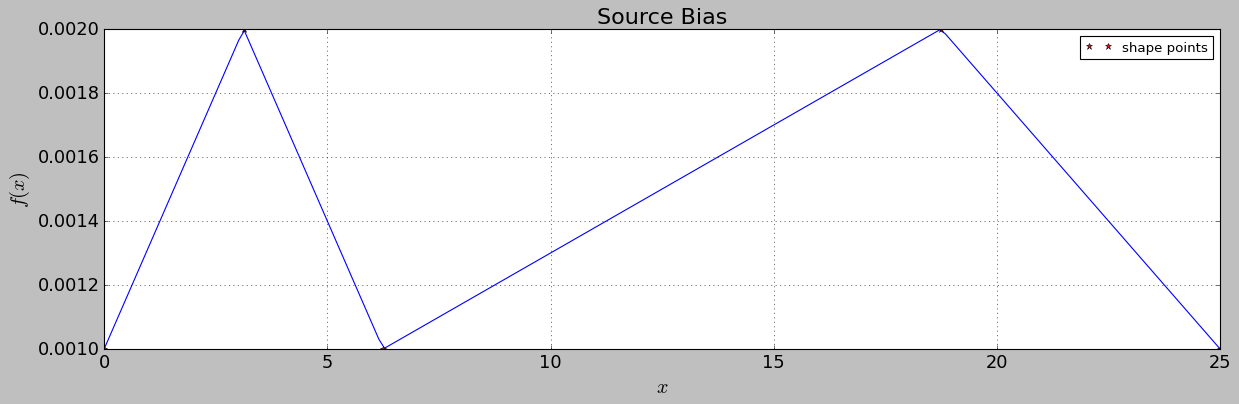

In [4]:
'''Generate the source bias'''

try:    
    from engy_5330.toolkit import TargetFunction   
except ModuleNotFoundError:
    assert False, 'You need to provide your own code here. Bailing out.'

shape_pts = [(x_a,source_bias_value), (x_b,source_bias_value)]
shape_pts = [(x_a,source_bias_value), ((x_a+x_b)/2,1.3*source_bias_value), (x_b,source_bias_value)]
shape_pts = [(x_a,source_bias_value), ((x_b+x_a)/2,-source_bias_value/4), (x_b,source_bias_value)]
shape_pts = [(x_a,source_bias_value), ((x_b+x_a)/8,2*source_bias_value), ((x_b+x_a)/4,source_bias_value), (3*(x_b+x_a)/4,2*source_bias_value), (x_b,source_bias_value)]

print('# shape pts = ', len(shape_pts))

source_bias = TargetFunction(shape_pts, type='stepwise')
source_bias = TargetFunction(shape_pts, type='linear')
#source_bias = TargetFunction(shape_pts, type='legendre')
  
source_bias.plot(n_plot_pts=200, show_shape_pts=True, title='Source Bias')

# shape pts =  5


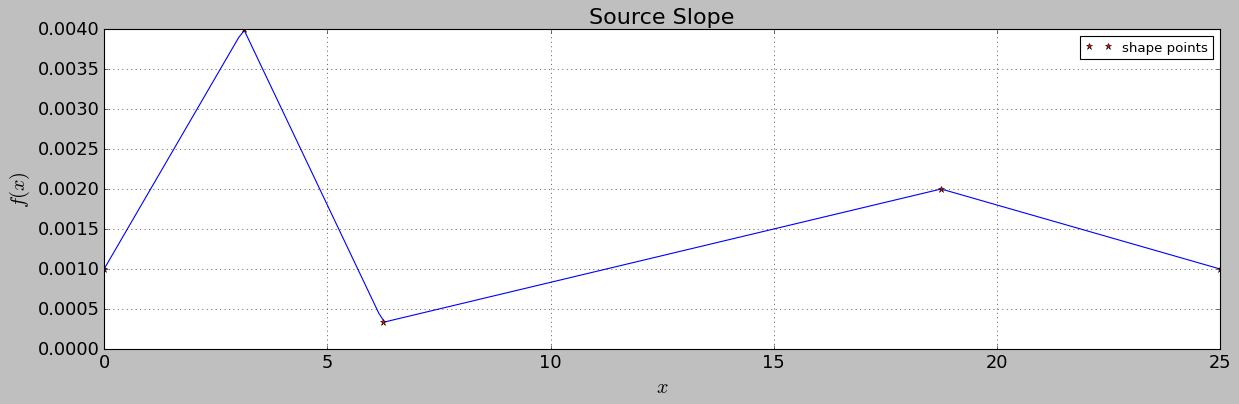

In [5]:
'''Generate the source slope'''

try:    
    from engy_5330.toolkit import TargetFunction   
except ModuleNotFoundError:
    assert False, 'You need to provide your own code here. Bailing out.'

shape_pts = [(x_a,source_slope_value), (x_b,source_slope_value)]
shape_pts = [(x_a,source_slope_value), ((x_b+x_a)/2,source_slope_value/4), (x_b,source_slope_value)]
shape_pts = [(x_a,source_slope_value), ((x_b+x_a)/8,4*source_slope_value), ((x_b+x_a)/4,source_slope_value/3), (3*(x_b+x_a)/4,2*source_slope_value), (x_b,source_slope_value)]

print('# shape pts = ', len(shape_pts))

source_slope = TargetFunction(shape_pts, type='legendre')
source_slope = TargetFunction(shape_pts, type='linear')
  
source_slope.plot(n_plot_pts=200, show_shape_pts=True, title='Source Slope')

### [Fourier Basis Functions](#toc)<a id="fourier-basis"></a>

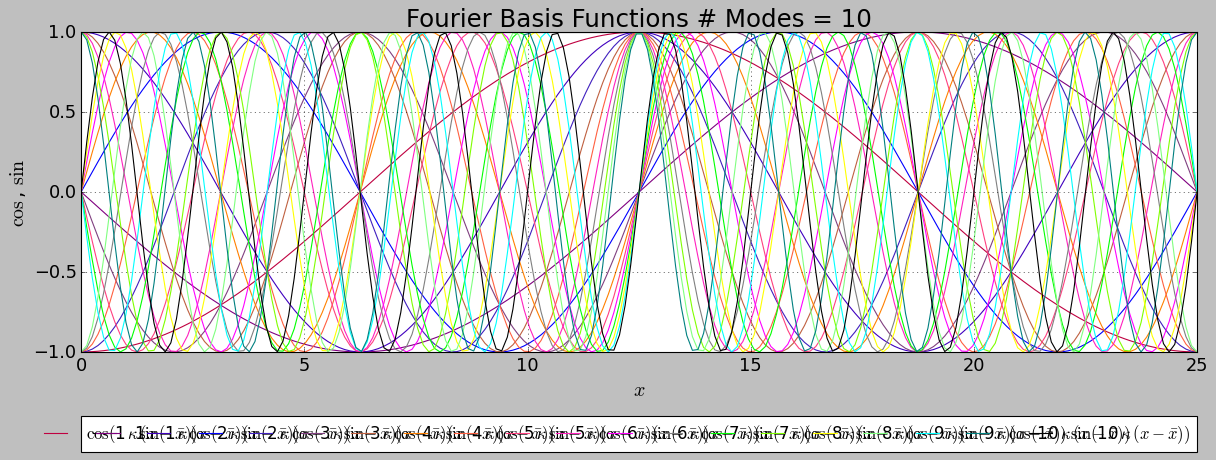

In [8]:
'''Build the basis functions list'''

import math

wavelength = x_b - x_a
kappa = 2*math.pi/wavelength

N = 10 # number of pairs of sine/cosine

try:    
    from engy_5330.toolkit import FourierBasis  
except ModuleNotFoundError:
    assert False, 'You need to provide your own code here. Bailing out.'

fb = FourierBasis(kappa, N, x_a, x_b)
fb.plot()

In [9]:
'''Build the matrix of coefficients of the linear system'''

import numpy as np
n = len(fb.basis_func_list)
a_mtrx = np.zeros((n, n), dtype=np.float64)
  
for i,phi_prime_i in enumerate(fb.basis_func_prime_list):
    for j,phi_prime_j in enumerate(fb.basis_func_prime_list):
        (a_ij, _) = fb.inner_product(phi_prime_j, phi_prime_i)
        a_mtrx[i,j] = a_ij * diff_coeff
        
for i,phi_i in enumerate(fb.basis_func_list):
    for j,phi_j in enumerate(fb.basis_func_list):
        s_x_phi_j = lambda x: source_slope(x) * phi_j(x)
        (a_ij, _) = fb.inner_product(s_x_phi_j, phi_i)
        a_mtrx[i,j] -= a_ij
        
# Boundary terms from integration by parts        
for i,phi_prime_i in enumerate(fb.basis_func_prime_list):
    for j,phi_j in enumerate(fb.basis_func_list):
        a_mtrx[i,j] -= diff_coeff * phi_prime_i(x_b) * phi_j(x_b)  - diff_coeff * phi_prime_i(x_a) * phi_j(x_a)

# Weakly enforced boundary conditions
for i,phi_i in enumerate(fb.basis_func_list):
    for j,phi_j in enumerate(fb.basis_func_list):
        a_mtrx[i,j] += phi_i(x_a) * phi_j(x_a) + phi_i(x_b) * phi_j(x_b)

In [11]:
try:    
    from engy_5330.toolkit import matrix_rank
except ModuleNotFoundError:
    assert False, 'You need to provide your own code here. Bailing out.'
    
if matrix_rank(a_mtrx) == min(a_mtrx.shape):
    print('A is full rank.')
else:
    print('A is rank deficient.')

A is full rank.


In [12]:
'''Build load vector'''

b_vec = np.zeros(n, dtype=np.float64)

for i, phi_i in enumerate(fb.basis_func_list):
    (b_vec[i], _) = fb.inner_product(source_bias, phi_i) 
    b_vec[i] += u_a*phi_i(x_a) + u_b*phi_i(x_b)               

In [13]:
'''Compute optimal coefficient vector'''

c_star_vec = np.linalg.solve(a_mtrx, b_vec)

In [14]:
'''Build the best approximation function in V_N'''

def u_star(x_pts):
    a_mtrx = fb.evaluation_matrix(x_pts)
    return a_mtrx@c_star_vec

### [Results](#toc)<a id="results"></a>

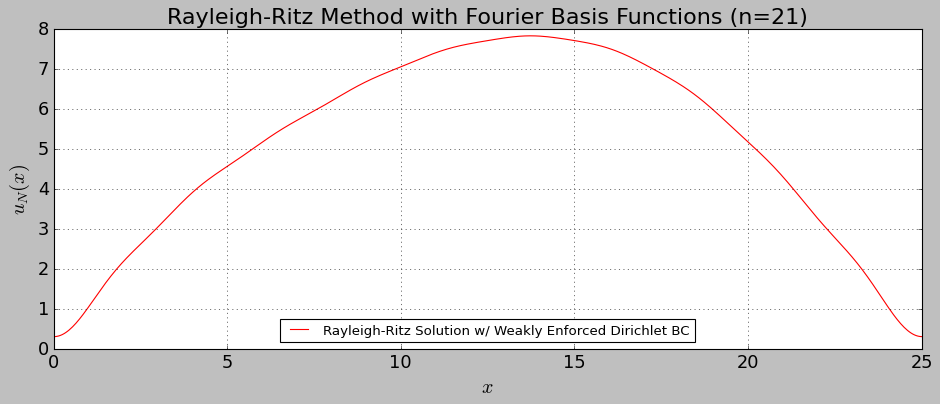

In [15]:
'''Rayleigh Ritz Method with Fourier Basis Functions'''

n_pts = 500
x = np.linspace(x_a, x_b, n_pts)
u_values = u_star(x)

import matplotlib.pyplot as plt
#%matplotlib inline
#plt.style.use('dark_background')
plt.figure(1, figsize=(14, 5))

plt.plot(x, u_values, 'r-', label='Rayleigh-Ritz Solution w/ Weakly Enforced Dirichlet BC')

plt.title(r'Rayleigh-Ritz Method with Fourier Basis Functions (n='+str(len(fb.basis_func_list))+')', fontsize=20)
plt.ylabel(r'$u_N(x)$', fontsize=18)
plt.xlabel(r'$x$', fontsize=18)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(loc='best',fontsize=12)
plt.grid(True)
plt.show()

In [16]:
'''Rayleigh-Ritz solution evaluated at the boundaries'''

np.set_printoptions(precision=5)
print('u_N(a) = ',u_star(x_a), ' u_N(b) = ',u_star(x_b))

u_N(a) =  [0.30979]  u_N(b) =  [0.30979]
